In [124]:
!git clone https://github.com/mjay9482/New_track

fatal: destination path 'New_track' already exists and is not an empty directory.


In [125]:
!ls New_track

driving_log.csv  IMG


In [126]:
import os
import ntpath
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image as mpimg
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.display import Image
from sklearn.model_selection import train_test_split
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
from imgaug import augmenters as iaa
import cv2
import random

In [127]:
%matplotlib inline

In [128]:
np.random.seed(0)

In [129]:
datadir = 'New_track'
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
data = pd.read_csv(os.path.join(datadir,'driving_log.csv'), names = columns)
pd.set_option('display.max_colwidth',None)
data.head()

center  \
0  /home/mrityunjay/Desktop/Data_new/IMG/center_2024_09_16_23_22_40_755.jpg   
1  /home/mrityunjay/Desktop/Data_new/IMG/center_2024_09_16_23_22_40_855.jpg   
2  /home/mrityunjay/Desktop/Data_new/IMG/center_2024_09_16_23_22_40_956.jpg   
3  /home/mrityunjay/Desktop/Data_new/IMG/center_2024_09_16_23_22_41_057.jpg   
4  /home/mrityunjay/Desktop/Data_new/IMG/center_2024_09_16_23_22_41_158.jpg   

                                                                      left  \
0   /home/mrityunjay/Desktop/Data_new/IMG/left_2024_09_16_23_22_40_755.jpg   
1   /home/mrityunjay/Desktop/Data_new/IMG/left_2024_09_16_23_22_40_855.jpg   
2   /home/mrityunjay/Desktop/Data_new/IMG/left_2024_09_16_23_22_40_956.jpg   
3   /home/mrityunjay/Desktop/Data_new/IMG/left_2024_09_16_23_22_41_057.jpg   
4   /home/mrityunjay/Desktop/Data_new/IMG/left_2024_09_16_23_22_41_158.jpg   

                                                                      right  \
0   /home/mrityunjay/Desktop/Data_new/IMG/right_2024_09_16_23_22_40_755.jpg   
1   /home/mrityunjay/Desktop/Data_new/IMG/right_2024_09_16_23_22_40_855.jpg   
2   /home/mrityunjay/Desktop/Data_new/IMG/right_2024_09_16_23_22_40_956.jpg   
3   /home/mrityunjay/Desktop/Data_new/IMG/right_2024_09_16_23_22_41_057.jpg   
4   /home/mrityunjay/Desktop/Data_new/IMG/right_2024_09_16_23_22_41_158.jpg   

   steering  throttle  reverse     speed  
0       0.0       0.0      0.0  0.000078  
1       0.0       0.0      0.0  0.000078  
2       0.0       0.0      0.0  0.000079  
3       0.0       0.0      0.0  0.000078  
4       0.0       0.0      0.0  0.000079

In [130]:
def path_leaf(path):
  head, tail = ntpath.split(path)
  return tail

data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)
data.head()

center                              left  \
0  center_2024_09_16_23_22_40_755.jpg  left_2024_09_16_23_22_40_755.jpg   
1  center_2024_09_16_23_22_40_855.jpg  left_2024_09_16_23_22_40_855.jpg   
2  center_2024_09_16_23_22_40_956.jpg  left_2024_09_16_23_22_40_956.jpg   
3  center_2024_09_16_23_22_41_057.jpg  left_2024_09_16_23_22_41_057.jpg   
4  center_2024_09_16_23_22_41_158.jpg  left_2024_09_16_23_22_41_158.jpg   

                               right  steering  throttle  reverse     speed  
0  right_2024_09_16_23_22_40_755.jpg       0.0       0.0      0.0  0.000078  
1  right_2024_09_16_23_22_40_855.jpg       0.0       0.0      0.0  0.000078  
2  right_2024_09_16_23_22_40_956.jpg       0.0       0.0      0.0  0.000079  
3  right_2024_09_16_23_22_41_057.jpg       0.0       0.0      0.0  0.000078  
4  right_2024_09_16_23_22_41_158.jpg       0.0       0.0      0.0  0.000079

In [131]:
data['speed'] = data['speed'] * 1e4

In [132]:
data.head()

center                              left  \
0  center_2024_09_16_23_22_40_755.jpg  left_2024_09_16_23_22_40_755.jpg   
1  center_2024_09_16_23_22_40_855.jpg  left_2024_09_16_23_22_40_855.jpg   
2  center_2024_09_16_23_22_40_956.jpg  left_2024_09_16_23_22_40_956.jpg   
3  center_2024_09_16_23_22_41_057.jpg  left_2024_09_16_23_22_41_057.jpg   
4  center_2024_09_16_23_22_41_158.jpg  left_2024_09_16_23_22_41_158.jpg   

                               right  steering  throttle  reverse     speed  
0  right_2024_09_16_23_22_40_755.jpg       0.0       0.0      0.0  0.779523  
1  right_2024_09_16_23_22_40_855.jpg       0.0       0.0      0.0  0.777276  
2  right_2024_09_16_23_22_40_956.jpg       0.0       0.0      0.0  0.789555  
3  right_2024_09_16_23_22_41_057.jpg       0.0       0.0      0.0  0.779120  
4  right_2024_09_16_23_22_41_158.jpg       0.0       0.0      0.0  0.786120

In [133]:
num_of_bins = 25
samples_per_bin = 200
bin_edges = np.linspace(-1, 1, num_of_bins + 1)
hist, bins = np.histogram(data['steering'], bins=bin_edges)

center = (bins[:-1] + bins[1:]) / 2

fig = go.Figure(data=[go.Bar(x=center, y=hist, width=(bins[1] - bins[0]), marker_color='navy', marker_line_color='white')])

fig.update_layout(
    title='Zero-Centered Steering Histogram',
    xaxis_title='Steering Angle',
    yaxis_title='Count',
    xaxis=dict(
        tickvals=center,
        ticktext=[f'{c:.2f}' for c in center]
    ),
    plot_bgcolor='white'
)
fig.show()

In [134]:
num_of_bins = 25
sample_per_bin = 200

bin_edges = np.linspace(-1, 1, num_of_bins + 1)
hist, bins = np.histogram(data['steering'], bins=bin_edges)

center = (bins[:-1] + bins[1:]) / 2

fig = go.Figure()

fig.add_trace(go.Bar(
    x=center,
    y=hist,
    width=(bins[1] - bins[0]),
    marker_color='navy',
    marker_line_color='white',
    opacity=0.7,
    name='Histogram'
))

fig.add_trace(go.Scatter(
    x=[np.min(data['steering']), np.max(data['steering'])],
    y=[sample_per_bin, sample_per_bin],
    mode='lines',
    line=dict(color='blue', width=2),
    name='Sample Line'
))

fig.update_layout(
    title='Zero-Centered Steering Histogram',
    xaxis_title='Steering Angle',
    yaxis_title='Count',
    plot_bgcolor='white',
    xaxis=dict(
        tickvals=center,
        ticktext=[f'{c:.2f}' for c in center]
    )
)
fig.show()

In [135]:
print(f"Total data: {len(data)}")
bin_edges = np.linspace(-1, 1, num_of_bins + 1)
bin_indices = np.digitize(data['steering'], bins=bin_edges, right=True)
remove_indices = []
for j in range(num_of_bins):
    current_bin_indices = np.where(bin_indices == j + 1)[0]
    np.random.shuffle(current_bin_indices)
    indices_to_remove = current_bin_indices[sample_per_bin:]
    remove_indices.extend(indices_to_remove)

print(f'Removed: {len(remove_indices)}')

data.drop(index=remove_indices, inplace=True)

print(f'Remaining: {len(data)}')
hist, _ = np.histogram(data['steering'],(num_of_bins))

fig = go.Figure()

fig.add_trace(go.Bar(
    x=center,
    y=hist,
    width=(bins[1] - bins[0]),
    marker_color='navy',
    marker_line_color='white',
    opacity=0.7,
    name='Histogram'
))

fig.add_trace(go.Scatter(
    x=[np.min(data['steering']), np.max(data['steering'])],
    y=[sample_per_bin, sample_per_bin],
    mode='lines',
    line=dict(color='blue', width=2),
    name='Sample Line'
))

fig.update_layout(
    title='Zero-Centered Steering Histogram',
    xaxis_title='Steering Angle',
    yaxis_title='Count',
    xaxis=dict(
        tickvals=center,
        ticktext=[f'{c:.2f}' for c in center]
    ),
    plot_bgcolor='white'
)
fig.show()

Total data: 3650
Removed: 2419
Remaining: 1231


In [136]:
print(data.iloc[1])
def load_img_steering(datadir, df):
    image_path = []
    steering = []

    for i in range(len(df)):
        row = df.iloc[i]
        center_img = row['center'].strip()
        steering_value = float(row['steering'])
        image_path.append(os.path.join(datadir, center_img))
        steering.append(steering_value)

    image_paths = np.array(image_path)
    steerings = np.array(steering)

    return image_paths, steerings

image_paths, steerings  = load_img_steering(datadir + '/IMG', data)

center      center_2024_09_16_23_22_41_762.jpg
left          left_2024_09_16_23_22_41_762.jpg
right        right_2024_09_16_23_22_41_762.jpg
steering                                   0.0
throttle                                   0.0
reverse                                    0.0
speed                                 0.778532
Name: 10, dtype: object


In [137]:
X_train, X_valid, y_train, y_valid = train_test_split(image_paths, steerings, test_size = 0.2, random_state = 6)

In [138]:
print(f'Training samples: {X_train.shape} \n Valid Samples: {X_valid.shape}')

Training samples: (984,) 
 Valid Samples: (247,)


In [139]:
fig = make_subplots(rows=1, cols=2, subplot_titles=('Training Set', 'Validation Set'))

bin_edges = np.linspace(min(np.min(y_train), np.min(y_valid)), max(np.max(y_train), np.max(y_valid)), num=num_of_bins+1)

fig.add_trace(
    go.Histogram(
        x=y_train,
        histnorm='',
        name='Training Set',
        marker_color='navy',
        xbins=dict(start=bin_edges[0], end=bin_edges[-1], size=(bin_edges[1] - bin_edges[0])),
        autobinx = False
    ),
    row=1, col=1
)

fig.add_trace(
    go.Histogram(
        x=y_valid,
        histnorm='',
        name='Validation Set',
        marker_color='red',
        xbins=dict(start=bin_edges[0], end=bin_edges[-1], size=(bin_edges[1] - bin_edges[0])),
        autobinx = False
    ),
    row=1, col=2
)

fig.update_layout(
    title_text='Histograms of Training and Validation Sets',
    xaxis_title='Value',
    xaxis2_title='Value',
    xaxis=dict(title='Training Set'),
    xaxis2=dict(title='Validation Set'),
    barmode='overlay',
    bargap=0.1,
    bargroupgap=0.1,
    plot_bgcolor='white'
)

# Show the interactive plot
fig.show()

In [140]:
def zoom(img):
  img = iaa.Affine(scale = (1,1.3)).augment_image(img)
  return img

Text(0.5, 1.0, 'Zoomed Image')

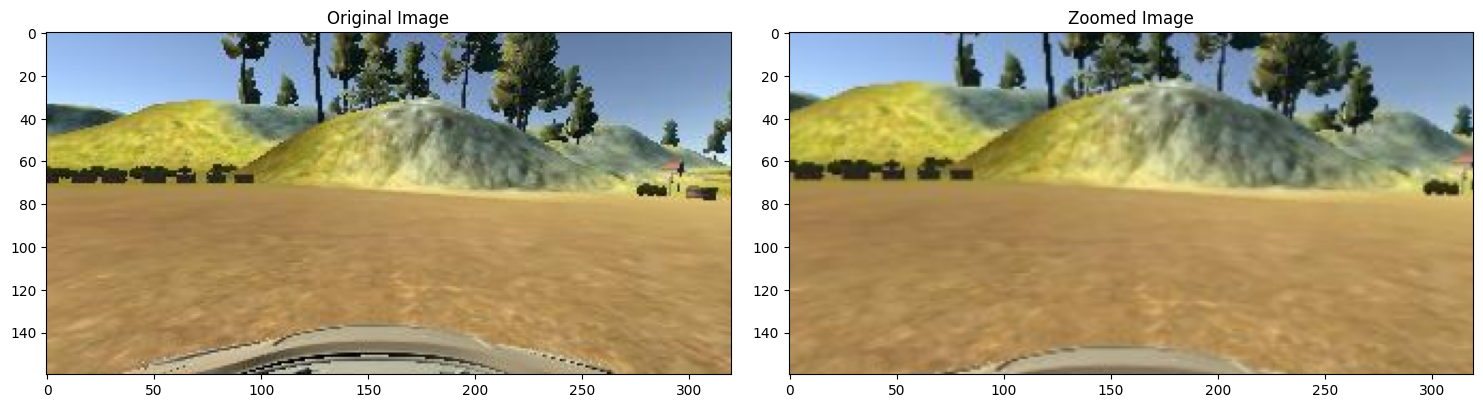

In [141]:
img = image_paths[random.randint(0,len(X_train)-1)]
original_image = mpimg.imread(img)
zoomed_image = zoom(original_image)

fig, axes = plt.subplots(1,2,figsize = (15,10))
fig.tight_layout()
axes[0].imshow(original_image)
axes[0].set_title('Original Image')
axes[1].imshow(zoomed_image)
axes[1].set_title('Zoomed Image')

In [142]:
def pan(img):
  img = iaa.Affine(translate_percent = {'x':(-0.1, 0.1), 'y':(-0.1, 0.1)}).augment_image(img)
  return img

Text(0.5, 1.0, 'Panned Image')

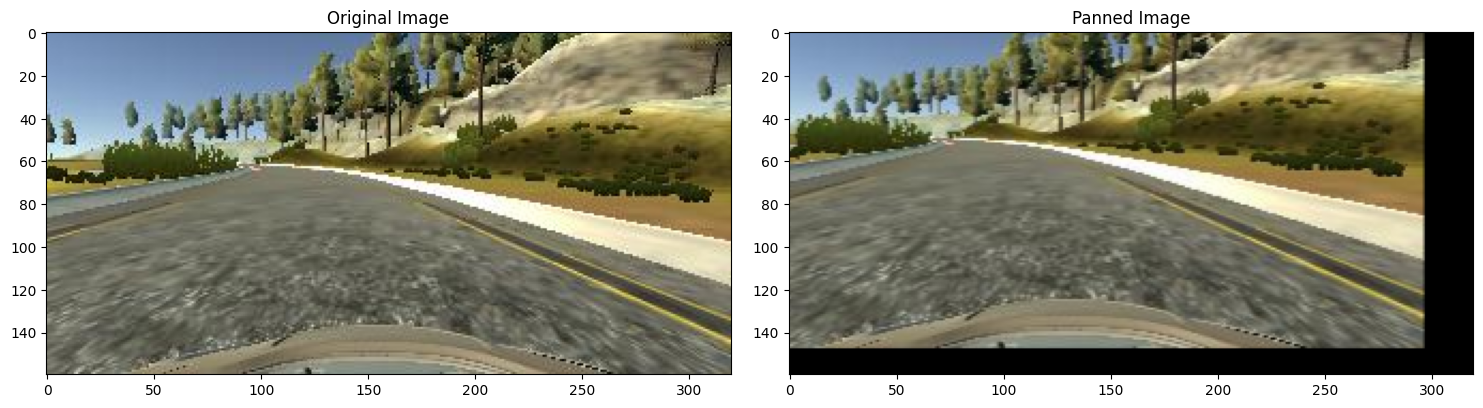

In [143]:
img = image_paths[random.randint(0,len(X_train)-1)]
original_image = mpimg.imread(img)
panned_image = pan(original_image)

fig, axes = plt.subplots(1,2,figsize = (15,10))
fig.tight_layout()
axes[0].imshow(original_image)
axes[0].set_title('Original Image')
axes[1].imshow(panned_image)
axes[1].set_title('Panned Image')

In [144]:
def img_random_brightness(img):
    seq = iaa.Multiply((0.2, 1.2))
    img_aug = seq.augment_image(img)
    return img_aug

Text(0.5, 1.0, 'Bright Image')

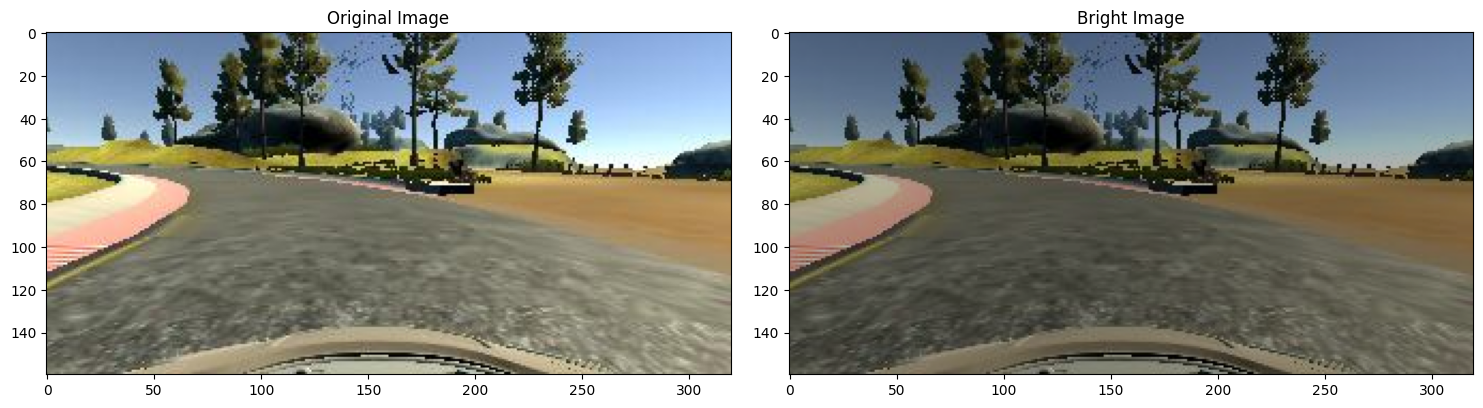

In [145]:
img = image_paths[random.randint(0,len(X_train)-1)]
original_image = mpimg.imread(img)
bright_image = img_random_brightness(original_image)

fig, axes = plt.subplots(1,2,figsize = (15,10))
fig.tight_layout()
axes[0].imshow(original_image)
axes[0].set_title('Original Image')
axes[1].imshow(bright_image)
axes[1].set_title('Bright Image')

In [146]:
def img_random_flip(img, steering_angle):
  img = cv2.flip(img, 1)
  steering_angle = -steering_angle
  return img, steering_angle

Text(0.5, 1.0, 'Flipped Image - steering angle 0.1861653')

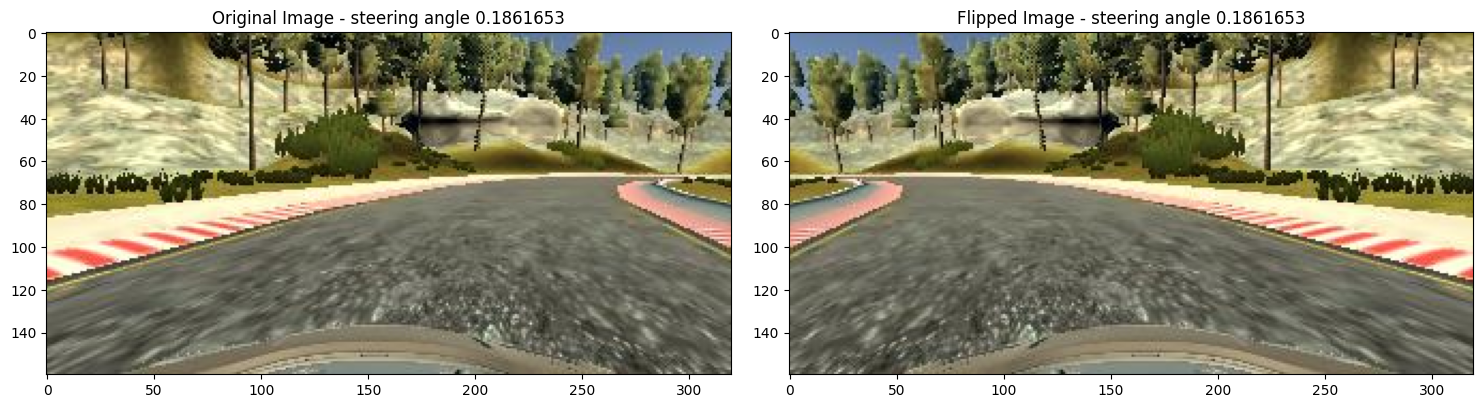

In [147]:
random_index = random.randint(0,len(X_train)-1)
steering_angle = steerings[random_index]
img = image_paths[random_index]

original_image = mpimg.imread(img)
flipped_image, _ = img_random_flip(original_image, steering_angle)

fig, axes = plt.subplots(1,2,figsize = (15,10))
fig.tight_layout()
axes[0].imshow(original_image)
axes[0].set_title('Original Image - ' + 'steering angle ' + str(steering_angle))
axes[1].imshow(flipped_image)
axes[1].set_title('Flipped Image - ' + 'steering angle ' + str(steering_angle))

In [148]:
def random_augment(image, steering_angle):
    image = mpimg.imread(image)
    if np.random.rand() < 0.5:
        image = pan(image)
    if np.random.rand() < 0.5:
        image = zoom(image)
    if np.random.rand() < 0.5:
        image = img_random_brightness(image)
    if np.random.rand() < 0.5:
        image, steering_angle = img_random_flip(image, steering_angle)
    return image, steering_angle


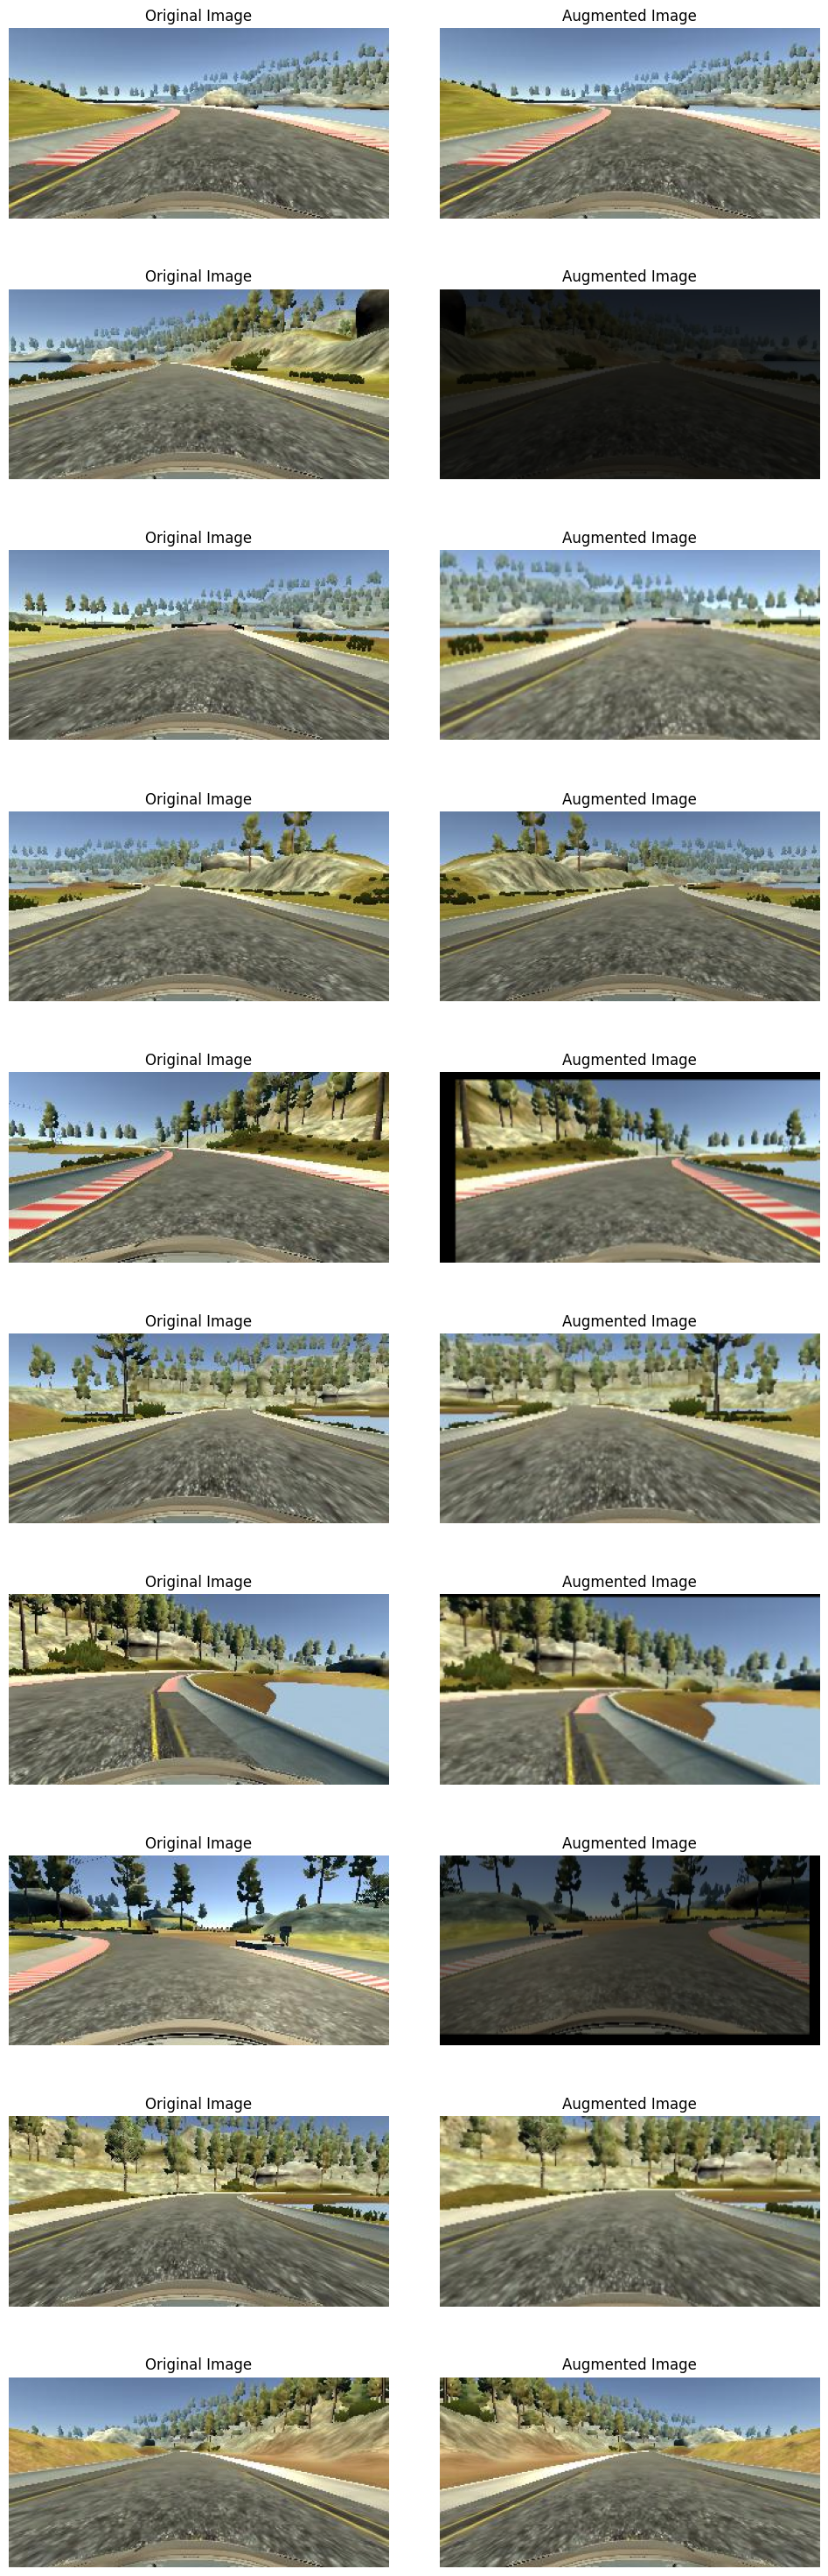

In [149]:
ncol = 2
nrow = 10

fig, axes = plt.subplots(nrow, ncol, figsize=(10, 30))
fig.subplots_adjust(hspace=0.3, wspace=0.1)
fig.tight_layout()
for i in range(nrow):
    random_index = random.randint(0, len(X_train) - 1)
    random_img = image_paths[random_index]
    random_steering = steerings[random_index]
    original_image = mpimg.imread(random_img)
    augmented_image, steering = random_augment(random_img, random_steering)
    axes[i][0].imshow(original_image)
    axes[i][0].set_title('Original Image')
    axes[i][0].axis('off')
    axes[i][1].imshow(augmented_image)
    axes[i][1].set_title('Augmented Image')
    axes[i][1].axis('off')

plt.show()

In [150]:
def img_processing(img):
  img = img[60:135, :, :]
  img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
  img = cv2.GaussianBlur(img,(3,3),0)
  img = cv2.resize(img, (200, 66))
  img = img / 255
  return img

Text(0.5, 1.0, 'Preprocessed Image')

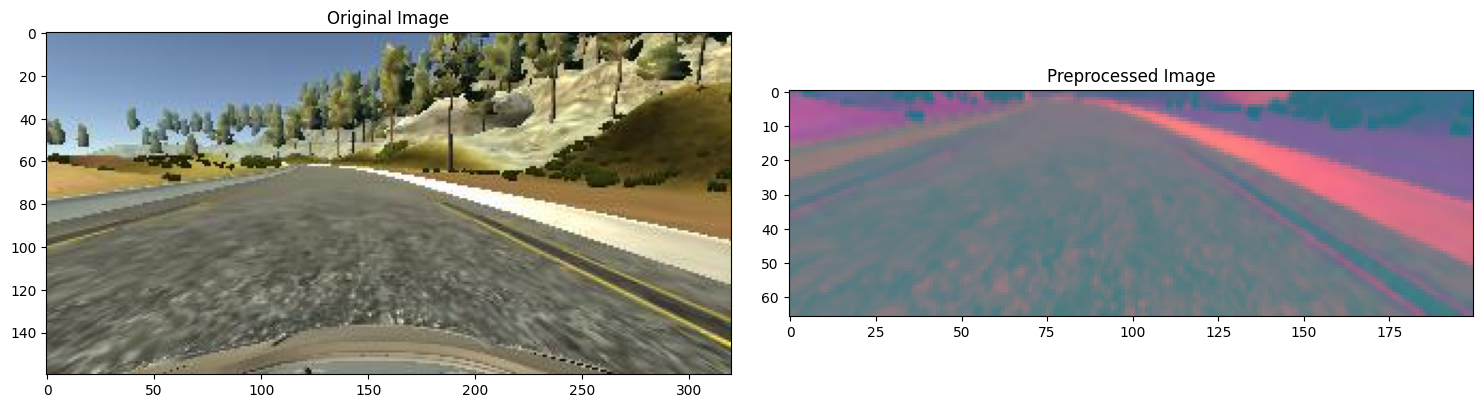

In [151]:
image = image_paths[100]
original_image = mpimg.imread(image)
preprocessed_image = img_processing(original_image)
fig, axes = plt.subplots(1, 2, figsize = (15,10))
fig.tight_layout()
axes[0].imshow(original_image)
axes[0].set_title('Original Image')
axes[1].imshow(preprocessed_image)
axes[1].set_title('Preprocessed Image')

In [152]:
def batch_generator(image_paths, steering_ang, batch_size, istraining):
  while True:
    batch_img = []
    batch_steering = []

    for i in range(batch_size):
      random_index  = random.randint(0, len(image_paths)-1)

      if istraining:
        im, steering = random_augment(image_paths[random_index], steering_ang[random_index])
      else:
        im = mpimg.imread(image_paths[random_index])
        steering = steering_ang[random_index]
      im = img_processing(im)
      batch_img.append(im)
      batch_steering.append(steering)
    yield (np.asarray(batch_img), np.asarray(batch_steering))

Text(0.5, 1.0, 'Validation Image')

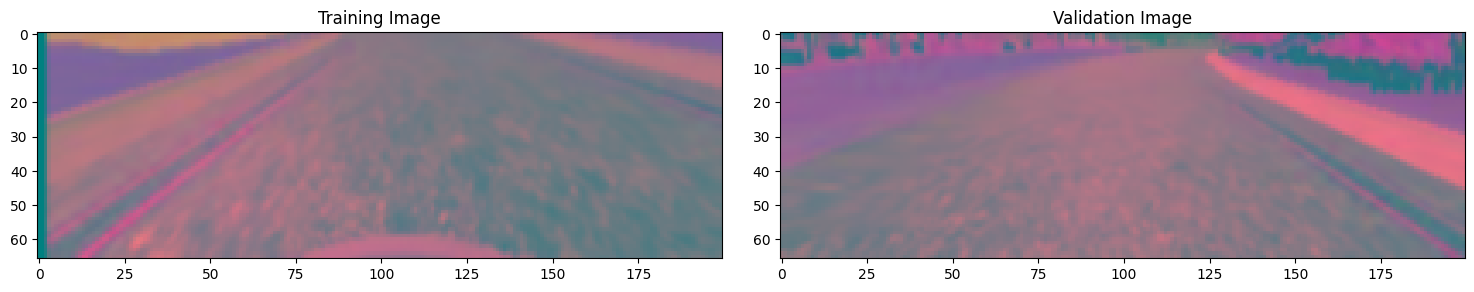

In [153]:
X_train_gen, y_train_gen = next(batch_generator(X_train, y_train, 1, 1))
X_valid_gen, y_valid_gen = next(batch_generator(X_valid, y_valid, 1, 0))

fig, axes = plt.subplots(1,2,figsize = (15,10))
fig.tight_layout()
axes[0].imshow(X_train_gen[0])
axes[0].set_title('Training Image')
axes[1].imshow(X_valid_gen[0])
axes[1].set_title('Validation Image')

In [156]:
def nvidia_model():

  model = Sequential()
  model.add(Conv2D(24, (5, 5), strides = (2, 2), input_shape= (66,200,3), activation = 'relu'))
  model.add(Conv2D(36, (5, 5), strides = (2, 2), activation = 'elu'))
  model.add(Conv2D(48, (5, 5), strides = (2, 2), activation = 'elu'))
  model.add(Conv2D(64, (3, 3), activation = 'elu'))
  model.add(Conv2D(64, (3, 3), activation = 'elu'))
  model.add(Dropout(0.5))

  model.add(Flatten())
  model.add(Dense(100,  activation = "elu"))
  model.add(Dropout(0.5))

  model.add(Dense(50,  activation = "elu"))
  model.add(Dropout(0.5))
  model.add(Dense(10 ,activation = "elu"))
  model.add(Dropout(0.5))
  model.add(Dense(1))

  return model

In [157]:
model = nvidia_model()
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 31, 98, 24)          │           1,824 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 14, 47, 36)          │          21,636 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 5, 22, 48)           │          43,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 3, 20, 64)           │          27,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 1, 18, 64)           │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 1, 18, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 100)                 │         115,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │             510 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 252,219 (985.23 KB)

 Trainable params: 252,219 (985.23 KB)

 Non-trainable params: 0 (0.00 B)

In [158]:
optimizer = Adam(learning_rate = 0.0001)
model.compile(loss = 'mean_squared_error', optimizer = optimizer)

In [159]:
history = model.fit(batch_generator(X_train, y_train, 100, 1),
                              steps_per_epoch = 300,
                              epochs = 10,
                              validation_data = batch_generator(X_valid, y_valid, 100, 1),
                              validation_steps = 200, verbose = 1, shuffle = 1)

Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 181s 574ms/step - loss: 0.2107 - val_loss: 0.1693
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 170s 568ms/step - loss: 0.1582 - val_loss: 0.1520
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 171s 572ms/step - loss: 0.1420 - val_loss: 0.1422
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 172s 574ms/step - loss: 0.1396 - val_loss: 0.1361
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 170s 570ms/step - loss: 0.1347 - val_loss: 0.1352
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 165s 552ms/step - loss: 0.1300 - val_loss: 0.1283
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 165s 551ms/step - loss: 0.1269 - val_loss: 0.1235
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 161s 537ms/step - loss: 0.1238 - val_loss: 0.1233
Epoch 9/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 164s 550ms/step - loss: 0.1206 - val_loss: 0.1244
Epoch 10/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 165s 551ms/step - loss: 0.1195 - val_loss: 0.1240


In [160]:
model.save('model.h5')

In [161]:
from google.colab import files
files.download('model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [163]:
def plot_loss(history):
    fig = go.Figure()

    fig.add_trace(go.Scatter(x=list(range(1, len(history.history['loss']) + 1)),
                             y=history.history['loss'],
                             mode='lines',
                             name='Training loss',
                             line=dict(color='navy')))

    fig.add_trace(go.Scatter(x=list(range(1, len(history.history['val_loss']) + 1)),
                             y=history.history['val_loss'],
                             mode='lines',
                             name='Validation loss',
                             line=dict(color='red')))

    fig.update_layout(title='Loss',
                      xaxis_title='Epochs',
                      yaxis_title='Loss',
                      legend=dict(x=0.02, y=0.98, bgcolor='rgba(255,255,255,0)'),
                      width=800,
                      height=400)

    fig.show()
plot_loss(history)